In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AcademicPerformance_New.csv")
print("Initial Dataset Shape:", df.shape)
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())

Initial Dataset Shape: (99, 8)

Missing Values Before Cleaning:
 Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64


In [3]:
# Step 1: Handle Missing Values
# Fill missing values in a single column (example: WT) with median
df['WT'] = df['WT'].fillna(df['WT'].median())

# Fill missing values in whole dataset:
# Use median for numeric columns, and 0 for categorical (as a placeholder)
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Fill numeric columns with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with 0 (as a string '0')
for col in categorical_cols:
    df[col] = df[col].fillna('0')

print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 Roll No        0
NationalITy    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64


In [4]:
# Step 2: Detect Outliers using IQR
outlier_list = []  # collect DataFrames with outliers

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    condition = (df[col] < lower) | (df[col] > upper)
    outliers = df[condition]

    # Append outliers to list
    if not outliers.empty:
        outlier_list.append(outliers)

    # Show Q1, Q3, and number of outliers
    print(f"\n{col}:\n  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}")
    print(f"  Outliers in {col}: {condition.sum()}")

# Concatenate all outliers if needed
all_outliers = pd.concat(outlier_list).drop_duplicates()
print(f"\nTotal unique outlier rows: {all_outliers.shape[0]}")
print(all_outliers)


Roll No:
  Q1 = 26.50, Q3 = 74.50
  Outliers in Roll No: 0

WT:
  Q1 = 53.00, Q3 = 71.00
  Outliers in WT: 1

DSBDA:
  Q1 = 55.00, Q3 = 74.00
  Outliers in DSBDA: 1

AI:
  Q1 = 54.00, Q3 = 74.00
  Outliers in AI: 2

Average:
  Q1 = 45.50, Q3 = 71.83
  Outliers in Average: 0

Total unique outlier rows: 3
    Roll No NationalITy    WT  DSBDA    AI    Average Grade   PG
17     18.0      Rassia  18.0   32.0  28.0  26.000000     D  Yes
76     77.0         USA  30.0   26.0  22.0  26.000000     D  Yes
59     60.0      Rassia  70.0   50.0  20.0  46.666667     D  Yes


In [5]:
# Step 3: Remove Outliers
df_cleaned = df.copy()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]

print("\nShape After Removing Outliers:", df_cleaned.shape)



Shape After Removing Outliers: (96, 8)


In [6]:
# Step 4: Aggregation Function (Max, Avg)
# Reason: Aggregation helps reduce skewness and aids visualization
print("\nAggregation Stats:")
for col in ['WT', 'DSBDA', 'AI', 'Average']:
    max_val = df_cleaned[col].max()
    mean_val = df_cleaned[col].mean()
    print(f"{col} - Max: {max_val}, Avg: {mean_val:.2f}")


Aggregation Stats:
WT - Max: 97.0, Avg: 62.00
DSBDA - Max: 95.0, Avg: 65.60
AI - Max: 92.0, Avg: 63.53
Average - Max: 91.6666666667, Avg: 59.48


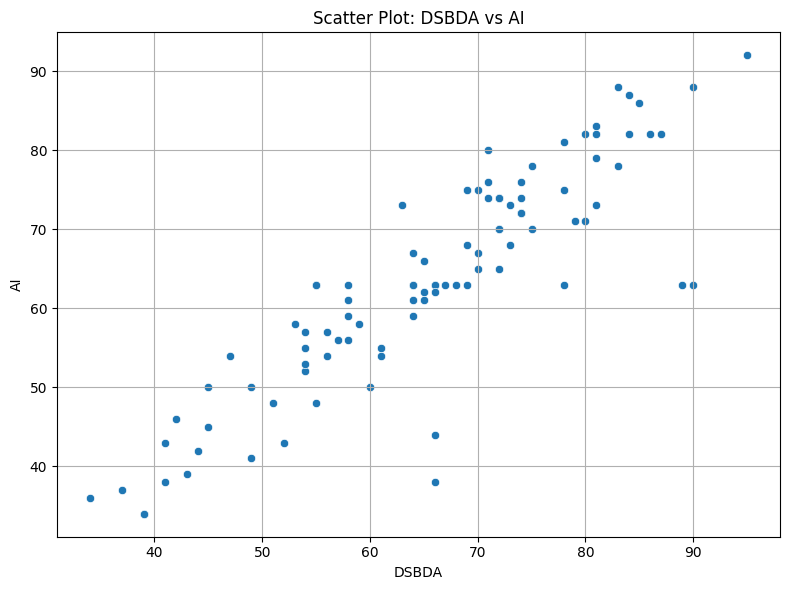

In [7]:
# Step 5: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DSBDA', y='AI', data=df_cleaned)
plt.title("Scatter Plot: DSBDA vs AI")
plt.xlabel("DSBDA")
plt.ylabel("AI")
plt.grid(True)
plt.tight_layout()
plt.show()